In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def set_fontsize(ax, fs):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

In [5]:
%%time
from quantumoperators import *
from hamiltonianoperators import *

Jmax = 6      # max J value in Hamiltonian
I_Tl = 1/2    # I1 in Ramsey's notation
I_F = 1/2     # I2 in Ramsey's notation

HamiltonianJ6 = Hamiltonian(Jmax, I_Tl, I_F)

Wall time: 51.1 s


# Loading Trajectories and Fields

In [6]:
from trajectories import *
positions = load_trajectories('positions_545.mat')
velocities = load_velocities('velocities_545.mat')

t, (xT, yT, zT), (xVelocity, yVelocity, zVelocity) = get_time_position_velocity(positions, velocities)

In [7]:
interpolateTrajectories = []
for idInt in range(t.shape[1]):
    interpolateTrajectories.append((make_interpolate(t[:,idInt], xT[:,idInt], yT[:,idInt], zT[:,idInt])))

In [8]:
del t, xT, yT, zT, xVelocity, yVelocity, zVelocity

In [9]:
from fields import *
c, intfun = fit_potential_xyz('potentialQuadrupole.fld', 0.022, 0.019, 0, 0)
cP, intfunP = fit_potential_xyz('potentialElectrodes.fld', 0.022, 0.019, .45, 0)
funEx,funEy,funEz,funEmag = combine_quadrupole_plate(c,intfun,cP,intfunP)

C:\Users\Olivier\Dropbox\Postdoc\Yale\CeNTREX Olivier\TlF Non-Adiabatic Transitions\fields.py:46: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


# Propagation 30 G Trajectory 323

0.6081667247329163
Wall time: 2min 10s


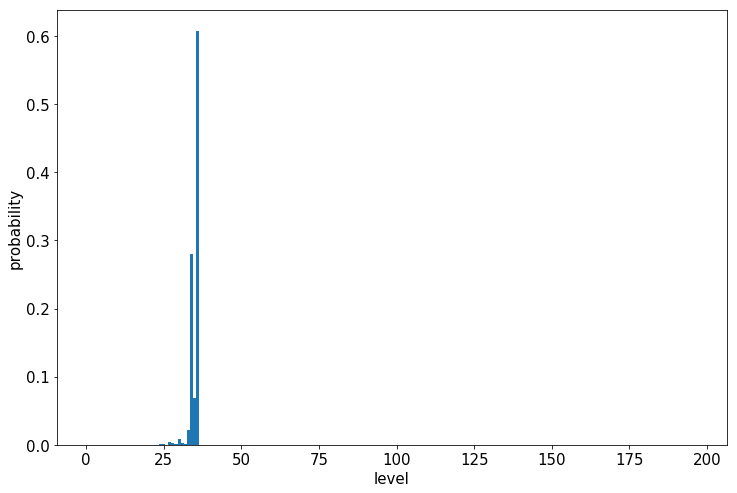

In [10]:
%%time 
from propagation import *
idT = 323
funB =  lambda x,y,z: (0, 30, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
t, H, phi = propagate_adaptive_save(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[idT], funE, funB, 
                                    35, dtAdaptive = (5e-7, 1e-6), nstep = 2)

probabilities = calculate_state_probabilities(phi[-1], H[0])

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi[0])**2)

In [11]:
%%time
energies, eigenvectors = np.linalg.eigh(H)

Wall time: 14.3 s


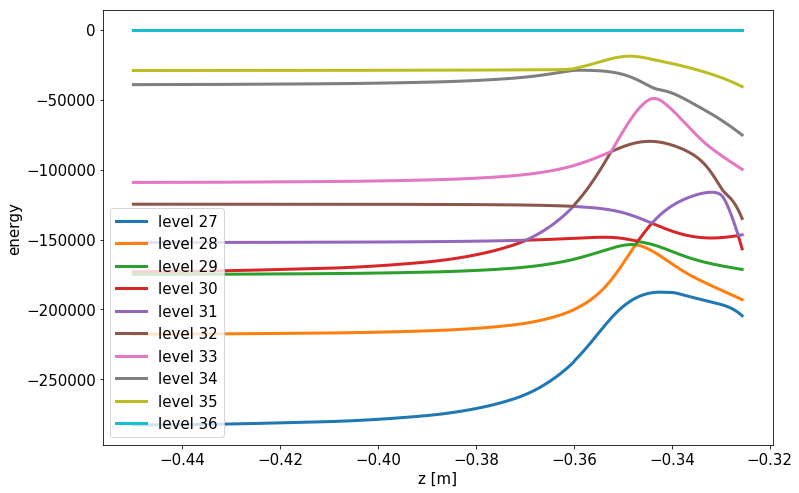

In [12]:
traj = interpolateTrajectories[idT]

fig, ax = plt.subplots(figsize = (12,8))
nstart, nstop = 0, 400
for l in range(26,36):
    ax.plot(traj[2](np.array(t))[nstart:nstop], energies[nstart:nstop,l]-energies[nstart:nstop,35], 
            label = 'level {0}'.format(l+1), lw = 3);
ax.legend(fontsize = 15)
ax.set_xlabel('z [m]')
ax.set_ylabel('energy')
set_fontsize(ax, 15)

# Propagate Trajectory 323 with 30 G Static & 10 MHz RF 10 V/cm

0.65141051074368
Wall time: 2h 36min 12s


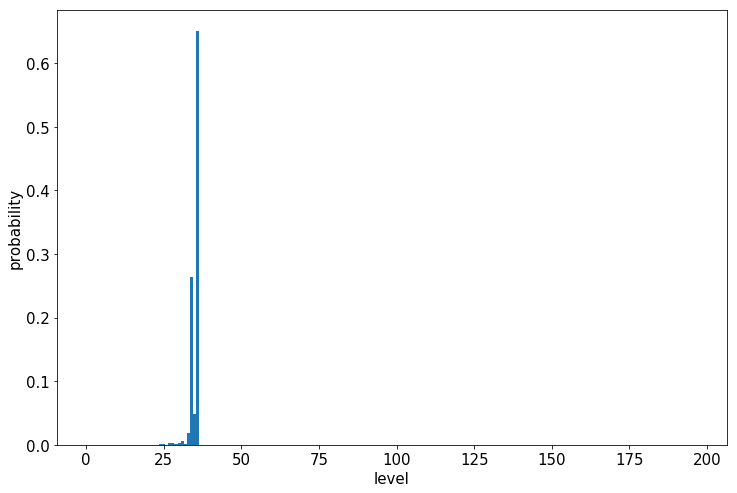

In [59]:
%%time 
from propagation import *
idT = 323
funB =  lambda x,y,z: (0, 30, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
resultRF10  = propagate_adaptive_RF(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[idT], funE, funB, 35, 10e6, 10, dtAdaptive = (5e-9, 1e-6))

H0, phi, phi0 = resultRF10

probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)

In [60]:
np.argmax(calculate_state_probabilities(resultRF10[1], resultRF10[0]))

35

0.7063548675204175
Wall time: 2h 30min 59s


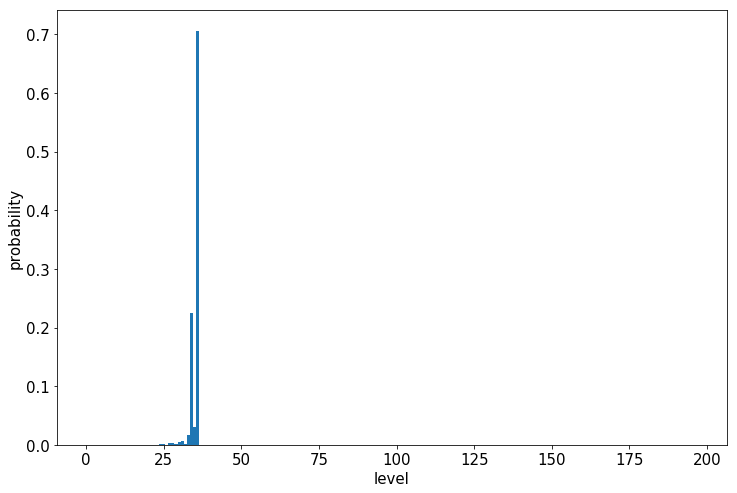

In [61]:
%%time 
from propagation import *
idT = 323
funB =  lambda x,y,z: (0, 30, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
resultRF15  = propagate_adaptive_RF(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[idT], funE, funB, 35, 10e6, 15, dtAdaptive = (5e-9, 1e-6))

H0, phi, phi0 = resultRF15

probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)

In [62]:
np.argmax(calculate_state_probabilities(resultRF15[1], resultRF15[0]))

35

# Propagate Trajectory 323 with 30 G Static & 10 MHz RF 25 V/cm

0.8474533283128379
Wall time: 2h 31min 2s


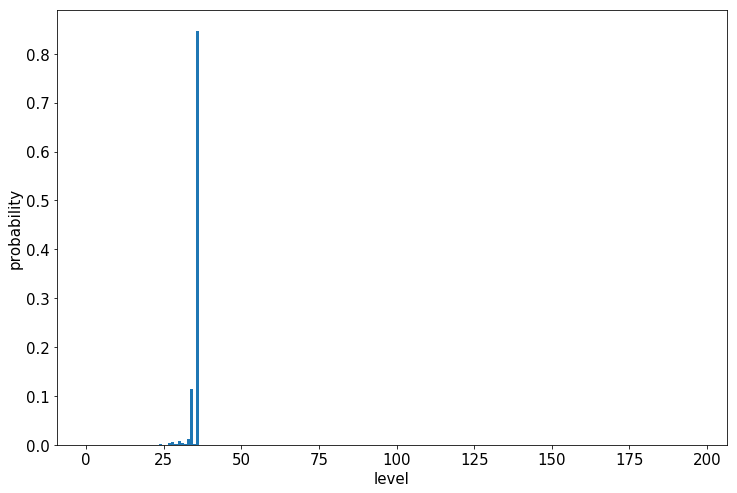

In [51]:
%%time 
from propagation import *
idT = 323
funB =  lambda x,y,z: (0, 30, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
resultRF25  = propagate_adaptive_RF(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[idT], funE, funB, 35, 10e6, 25, dtAdaptive = (5e-9, 1e-6))

H0, phi, phi0 = resultRF25

probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)

In [58]:
np.argmax(calculate_state_probabilities(resultRF25[1], resultRF25[0]))

35

# Propagate Trajectory 323 with 30 G Static & 10 MHz RF 50 V/cm

0.5221036766899371
Wall time: 2h 30min 59s


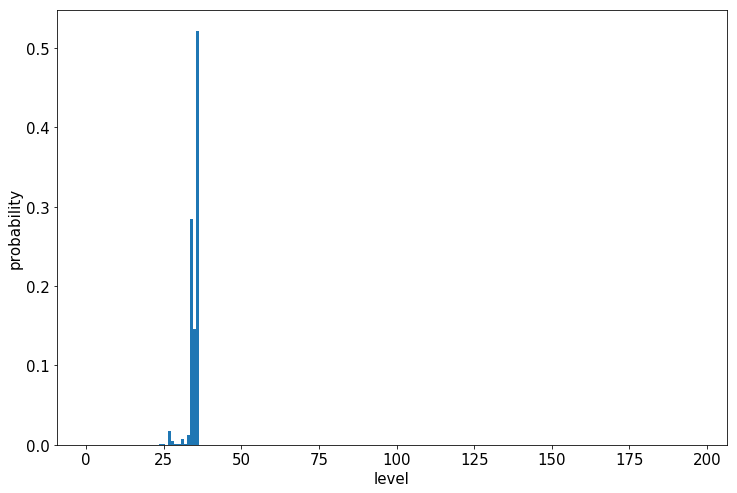

In [52]:
%%time 
from propagation import *
idT = 323
funB =  lambda x,y,z: (0, 30, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
resultRF50  = propagate_adaptive_RF(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[idT], funE, funB, 35, 10e6, 50, dtAdaptive = (5e-9, 1e-6))

H0, phi, phi0 = resultRF50

probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)

In [57]:
np.argmax(calculate_state_probabilities(resultRF50[1], resultRF50[0]))

35

# Propagate Trajectory 323 with 30 G Static & 10 MHz RF 100 V/cm

0.8474533283128379
Wall time: 2h 31min


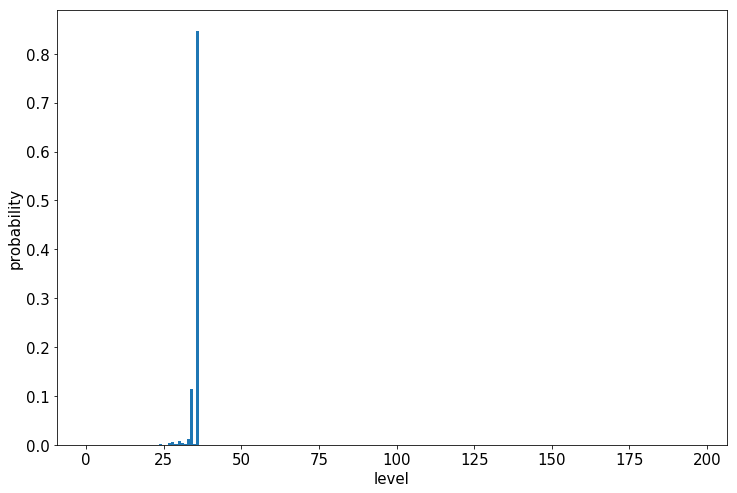

In [53]:
%%time 
from propagation import *
idT = 323
funB =  lambda x,y,z: (0, 30, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
resultRF100  = propagate_adaptive_RF(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[idT], funE, funB, 35, 10e6, 100, dtAdaptive = (5e-9, 1e-6))

H0, phi, phi0 = resultRF100
 
probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)

In [56]:
np.argmax(calculate_state_probabilities(resultRF100[1], resultRF100[0]))

34

# Propagate Trajectory 323 with 30 G Static & 10 MHz RF 50 V/cm & Smaller dT

0.5235889573424533
Wall time: 6h 10min 4s


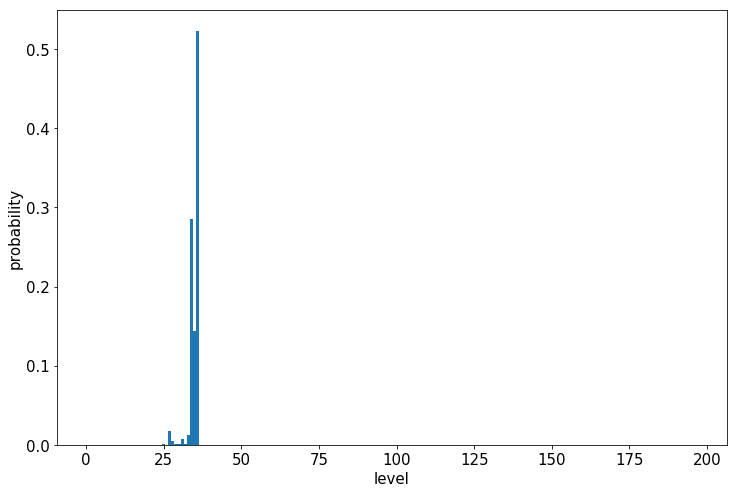

In [54]:
%%time 
from propagation import *
idT = 323
funB =  lambda x,y,z: (0, 30, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
resultRF50dT  = propagate_adaptive_RF(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[idT], funE, funB, 35, 10e6, 50, dtAdaptive = (2e-9, 1e-6))

H0, phi, phi0 = resultRF50dT

probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)